In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
df = pd.read_csv('spotify.csv')

features_list = df.columns.tolist()
metadata_list = features_list[:4]
numeric_list = features_list[4:]

numeric = df[numeric_list]
small_vals = numeric.drop(['popularity', 'tempo', 'duration_ms', 'key', 'loudness', 'time_signature', 'mode'], axis=1)
categorical = df.loc[:,['key', 'mode']]

popular = df[df.popularity > 85]
numeric_popular = popular[numeric_list]
small_popular = numeric_popular.drop(['popularity', 'tempo', 'duration_ms', 'key', 'loudness', 'time_signature', 'mode'], axis=1)

df

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DaBaby,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,2020-04-17,100,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.4970,89.977,181733,4
1,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,2020-03-20,99,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
2,Jawsh 685,Savage Love (Laxed - Siren Beat),1xQ6trAsedVPCdbtDAmk0c,2020-06-11,97,0.767,0.481,0,-8.520,0,0.0803,0.23400,0.000000,0.2690,0.7610,150.076,171375,4
3,Harry Styles,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,2019-12-13,96,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.5570,95.390,174000,4
4,Topic,Breaking Me,3H7ihDc1dqLriiWXwsc2po,2019-12-19,96,0.789,0.720,8,-5.652,0,0.2180,0.22300,0.000000,0.1290,0.6640,122.031,166794,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,070 Shake,SCAR,08xkNDko1wfeqOZdkCXC9K,2020-07-31,62,0.576,0.434,1,-7.769,1,0.0491,0.28400,0.000002,0.1180,0.0588,118.259,187335,4
1860,Beyoncé,"SPIRIT - From Disney's ""The Lion King""",2Zlw9b4RYv2jFxupJCEoN2,2020-07-31,62,0.447,0.436,10,-8.119,1,0.0389,0.00971,0.000000,0.0986,0.0497,80.856,277071,4
1861,J Balvin,Sigo Extrañándote,5Uc9brIj5A76d4TYpLJt94,2020-07-31,42,0.872,0.865,9,-4.248,1,0.2440,0.17400,0.000034,0.1590,0.9350,93.035,202373,4
1862,J Balvin,Brillo,614Z2GSe3D7ckYkGGgTZag,2020-07-31,42,0.524,0.384,9,-10.049,0,0.3600,0.89000,0.000000,0.0964,0.7680,145.947,159573,4


In [3]:
df.describe(include='all')

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1864,1864,1864,1864,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000
unique,655,1845,1864,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Juice WRLD,Five More Minutes,2tFwfmceQa1Y6nRPhYbEtC,2020-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,45,2,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,75.841202,0.686488,0.607362,5.289700,-6.753185,0.611052,0.134269,0.244322,0.015573,0.176098,0.482778,122.176208,194270.862124,3.947425
std,NaN,NaN,NaN,NaN,5.972337,0.149540,0.168876,3.592319,2.964991,0.487642,0.124191,0.245505,0.098409,0.131887,0.222296,30.720173,43747.192867,0.393757
min,NaN,NaN,NaN,NaN,41.000000,0.000000,0.000216,0.000000,-31.839000,0.000000,0.000000,0.000118,0.000000,0.029400,0.000000,0.000000,48000.000000,0.000000
25%,NaN,NaN,NaN,NaN,72.000000,0.594000,0.503000,2.000000,-7.895000,0.000000,0.045175,0.048950,0.000000,0.099200,0.314000,97.894000,168360.250000,4.000000
50%,NaN,NaN,NaN,NaN,75.000000,0.702500,0.619000,5.000000,-6.227000,1.000000,0.078800,0.156000,0.000000,0.123000,0.483000,120.080000,192395.500000,4.000000
75%,NaN,NaN,NaN,NaN,79.000000,0.794000,0.726000,8.000000,-4.996000,1.000000,0.195250,0.372250,0.000014,0.207000,0.651000,144.093000,216001.000000,4.000000


In [36]:
popular.describe(include='all')

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,130,130,130,130,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
unique,83,129,130,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Taylor Swift,Falling,3ZCTVFBt2Brf31RLEnCkWJ,2020-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,2,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,89.146154,0.703677,0.594015,5.753846,-6.663269,0.584615,0.119762,0.294012,0.009896,0.162720,0.508983,120.474831,200726.876923,3.992308
std,NaN,NaN,NaN,NaN,2.792880,0.134870,0.162902,3.685424,2.511032,0.494695,0.105616,0.271699,0.066062,0.123241,0.229090,28.943422,39150.000629,0.340910
min,NaN,NaN,NaN,NaN,86.000000,0.298000,0.111000,0.000000,-17.540000,0.000000,0.025300,0.001460,0.000000,0.048900,0.039700,62.948000,106000.000000,1.000000
25%,NaN,NaN,NaN,NaN,87.000000,0.613000,0.479500,2.000000,-8.022750,0.000000,0.042600,0.069700,0.000000,0.091000,0.337250,96.993000,172285.750000,4.000000
50%,NaN,NaN,NaN,NaN,89.000000,0.723500,0.607500,6.000000,-6.381000,1.000000,0.070350,0.217500,0.000000,0.109500,0.514000,117.459500,198794.500000,4.000000
75%,NaN,NaN,NaN,NaN,91.000000,0.806750,0.715750,9.000000,-4.863500,1.000000,0.171500,0.466250,0.000055,0.194500,0.678000,140.006750,219011.500000,4.000000


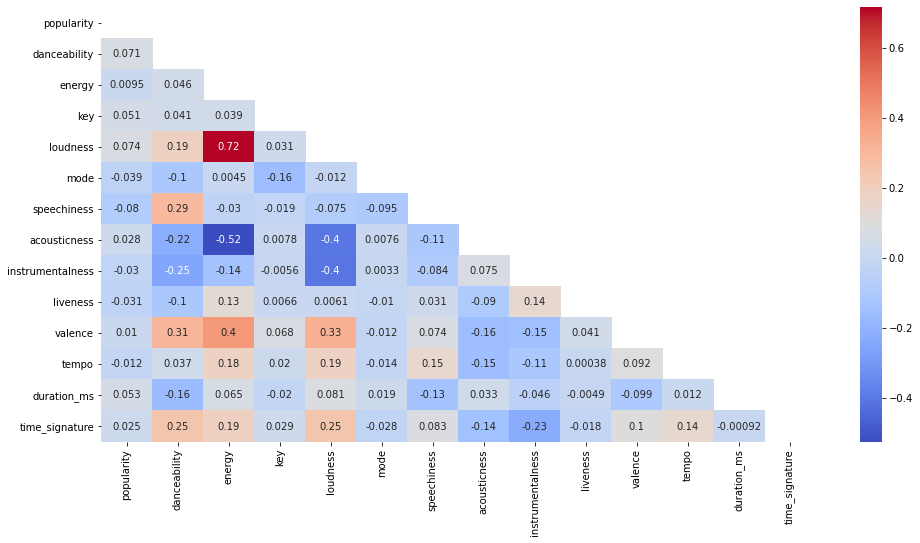

In [4]:
mask = np.triu(numeric.corr())
plt.figure(figsize=(16, 8))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', mask=mask)
plt.show()

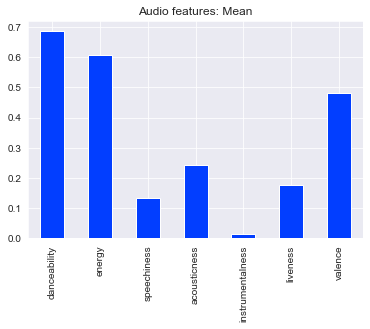

In [5]:
sns.set_palette('bright')
sns.set_style('darkgrid')

small_vals.mean().plot.bar()
plt.title('Audio features: Mean')
plt.show()

In [30]:
def feature_distplot(feature, df):
    sns.distplot(df[feature])
    plt.axvline(df[feature].mean(), linestyle='--')
    plt.title(feature, size=16)
    if feature in small_vals.columns.tolist():
        plt.xlim((0, 1))

def feature_countplot(feature, df, mapping):
    data = pd.DataFrame({feature: df.sort_values(by=feature).loc[:,feature].map(mapping)})
    sns.countplot(x=feature, data=data)
    plt.title(feature, size=16)

def graph_features(df):
    maps = {'key': {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}, 'mode': {0.0: 'minor', 1.0: 'major'}}

    num_rows = 4
    num_cols = 3

    plt.figure(figsize=(num_cols * 8, num_rows * 8))
    for i, feature in enumerate(small_vals.columns.tolist()):
        plt.subplot(num_rows, num_cols, i + 1)
        feature_distplot(feature, df)
    for i, feature in enumerate(categorical.columns.tolist()):
        plt.subplot(num_rows, num_cols, i + len(small_vals.columns.tolist()) + 1)
        feature_countplot(feature, df, maps[feature])
    for i, feature in enumerate(['tempo', 'duration_ms', 'loudness']):
        plt.subplot(num_rows, num_cols, i + len(small_vals.columns.tolist()) + len(categorical.columns.tolist()) + 1)
        feature_distplot(feature, df)
    plt.show()

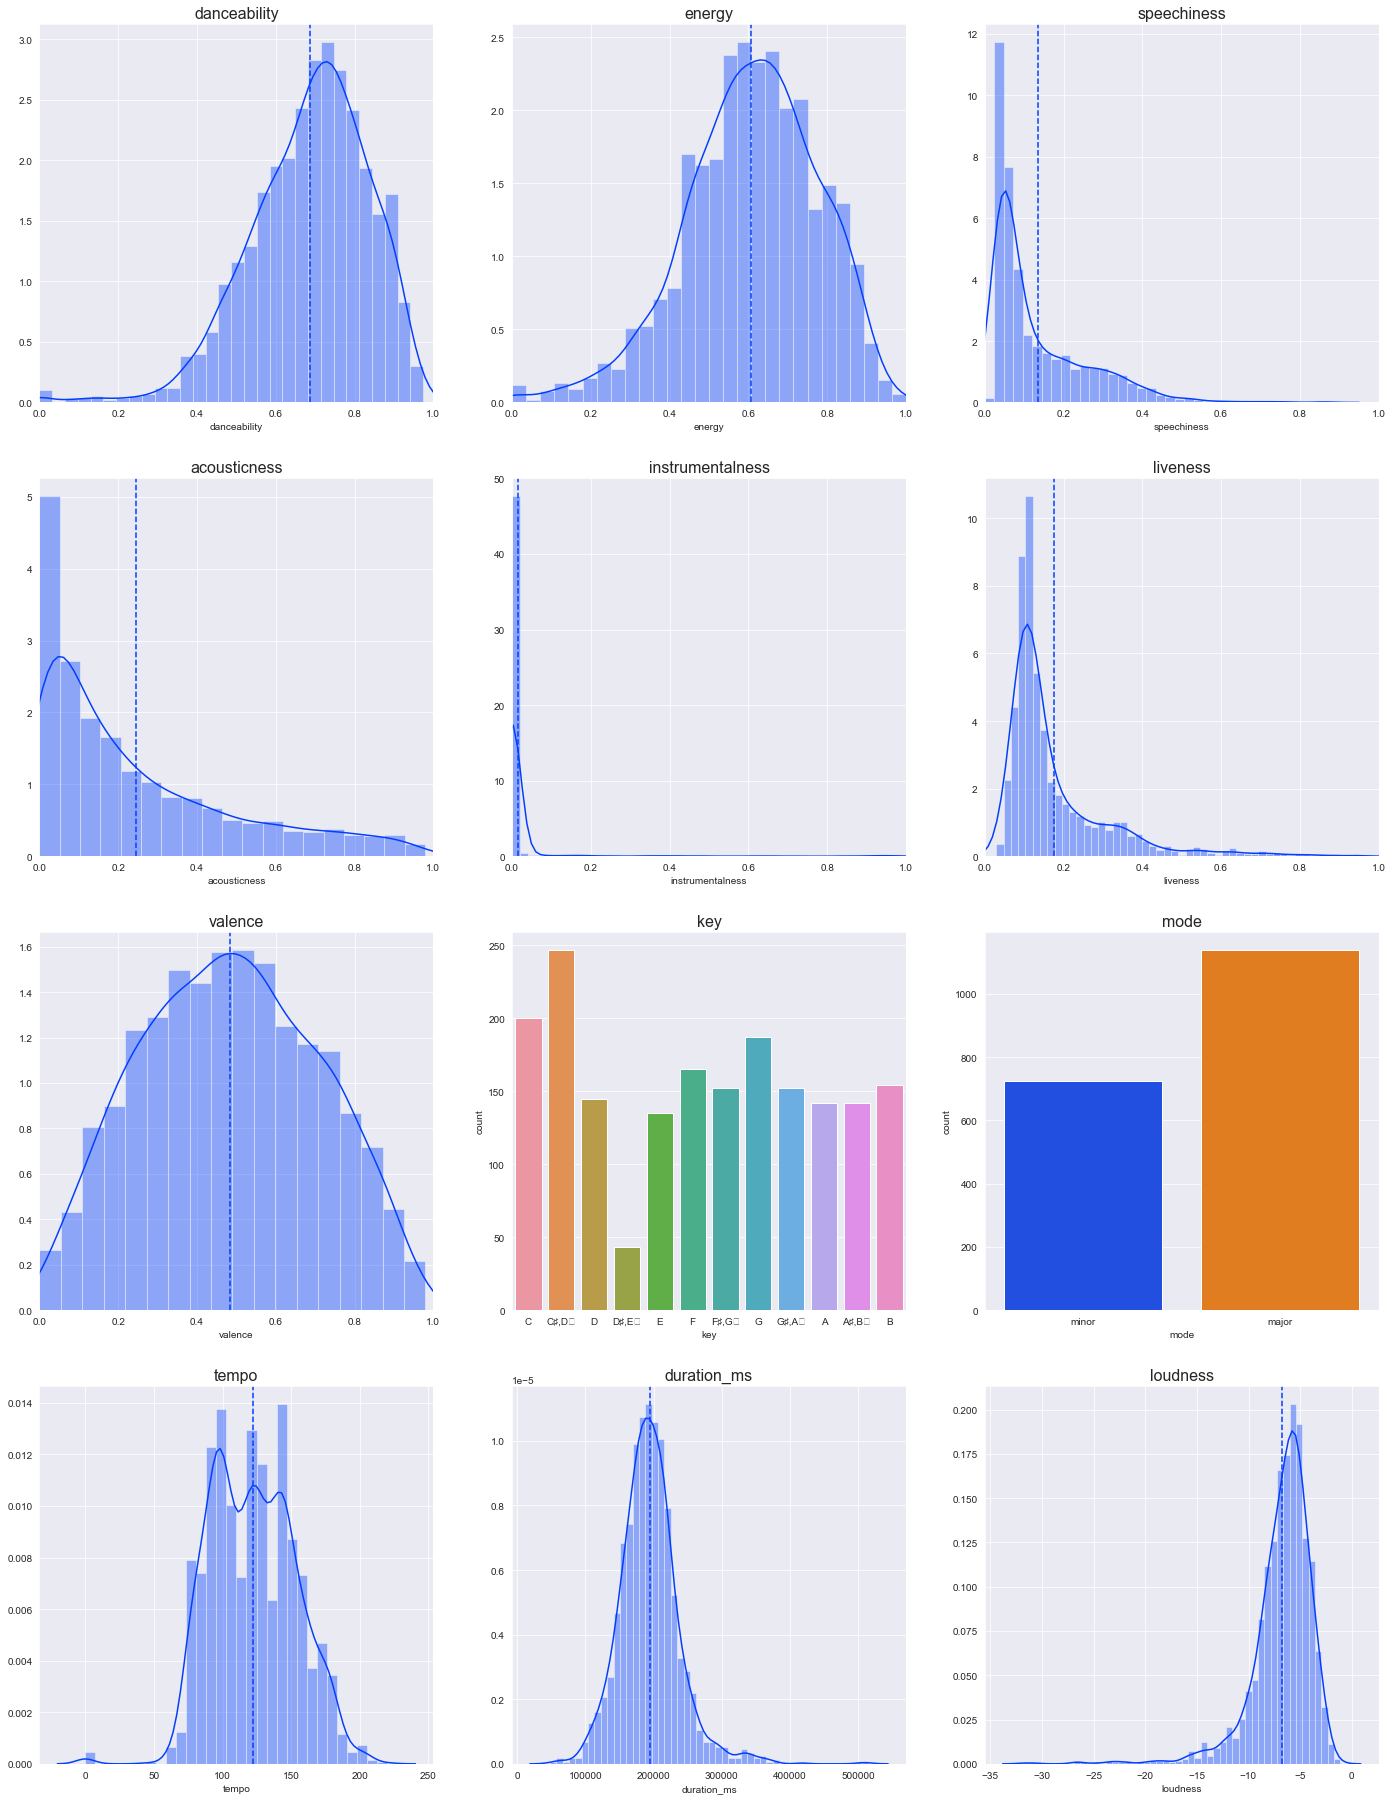

In [31]:
graph_features(df)

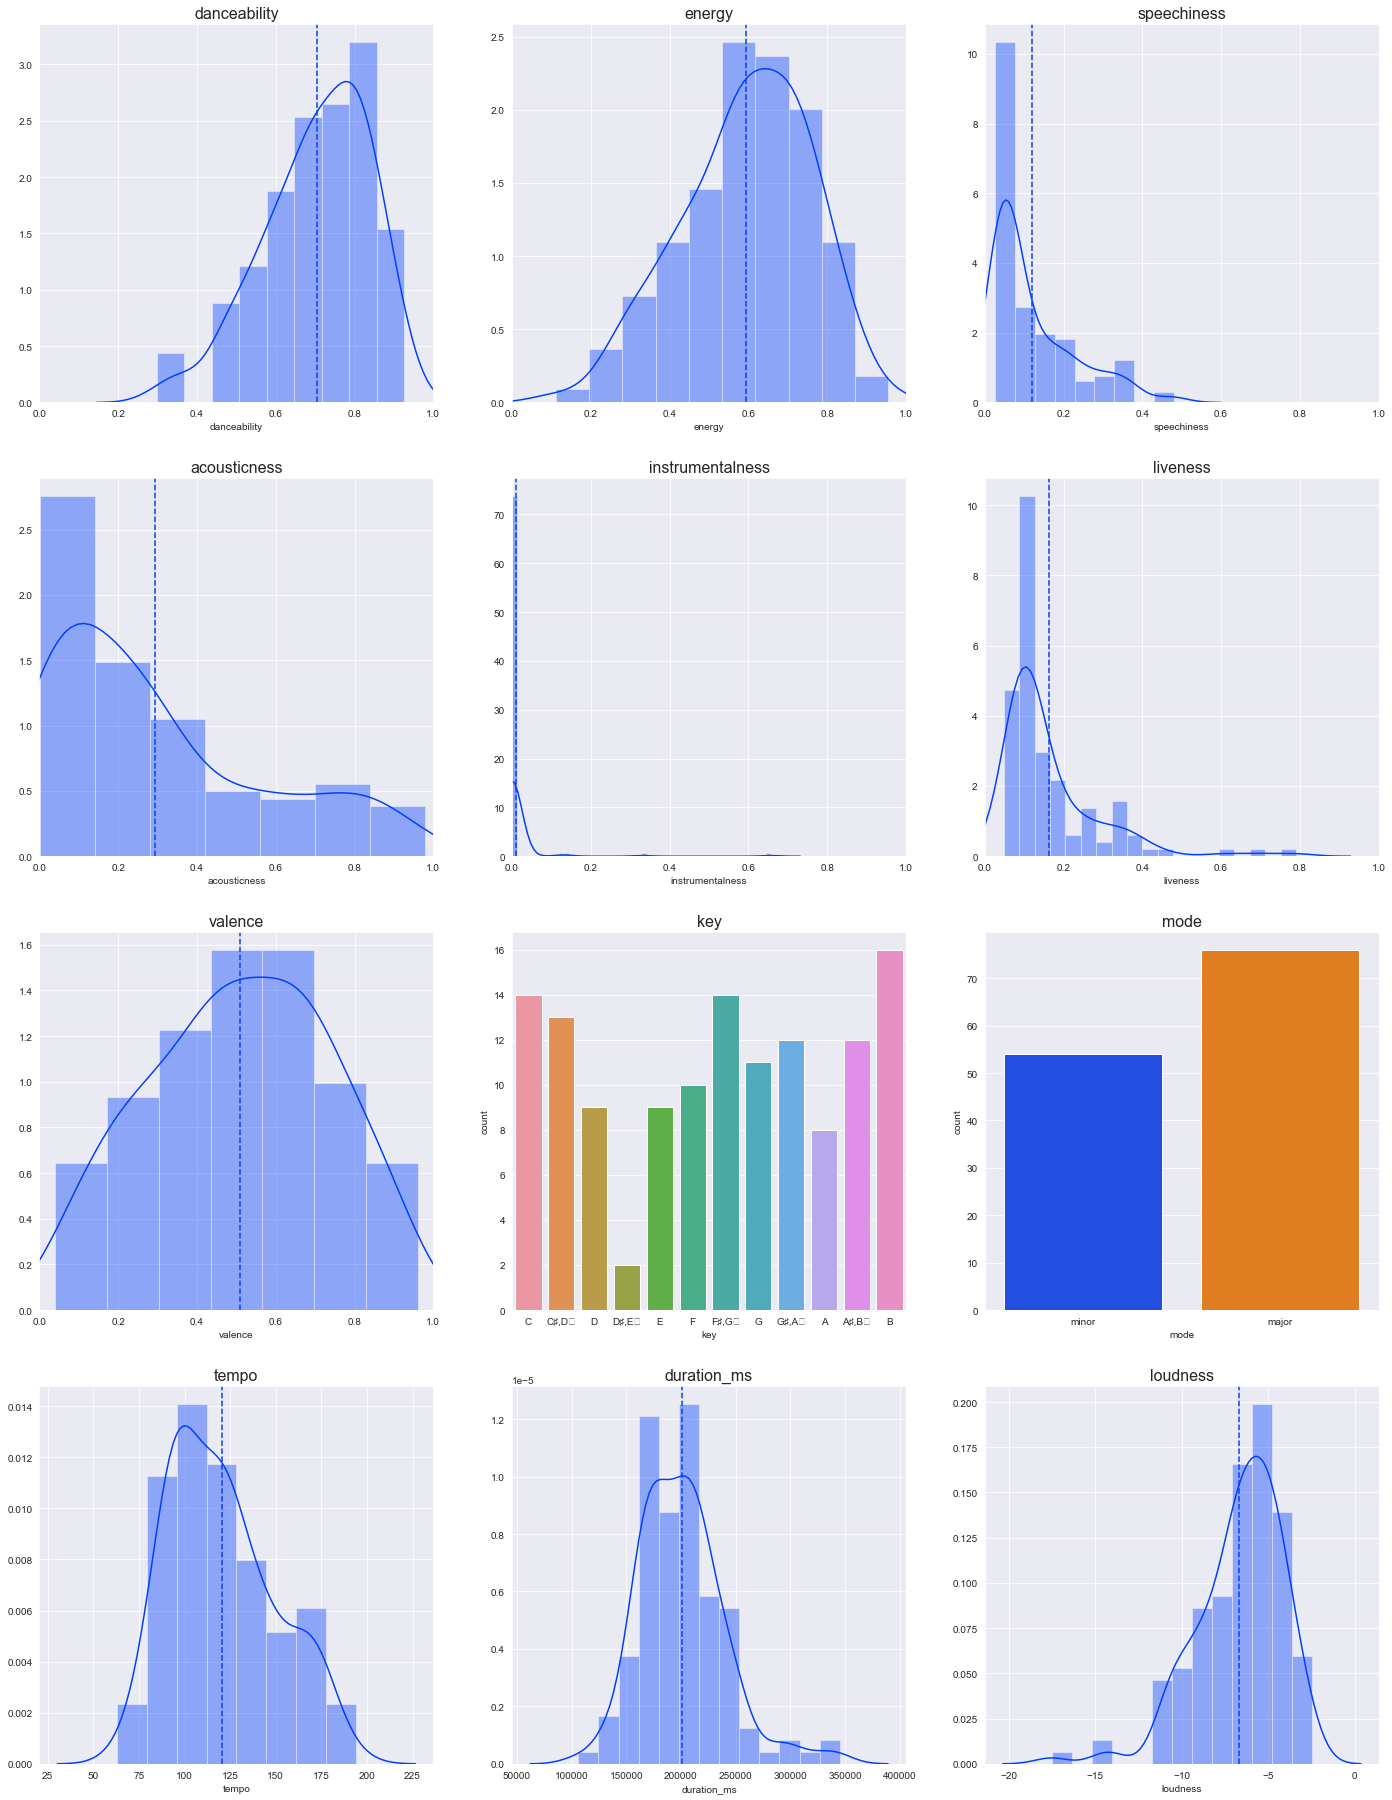

In [32]:
graph_features(popular)